# 1st Part: Scraping Data

In [1]:
#Saya mengimport semua perpustakaan yang dibutuhkan
import pandas as pd
from bs4 import BeautifulSoup
import requests
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
jkt48_url = 'https://id.wikipedia.org/wiki/Daftar_anggota_JKT48'

def jkt48_table(url): #define fungsi untuk memproses url menjadi tabel
    jkt48_html = requests.get(url) #request link wikipedia menggunakan library requests
    soup = BeautifulSoup(jkt48_html.content,'lxml') #gunakan library beautifulsoup untuk mendapatkan soup dari link wikipedia
    raw_table = soup.find_all('table',class_='wikitable sortable')[1:5] #gunakan fungsi find all untuk mencari html tabel yang diawali dengan tag 'table' dan class 'wikitable sortable'
    jkt48_list = pd.read_html(str(raw_table),attrs=list) #ubah tabel html menjadi list menggunakan fungsi pandas read html
    jkt48_final_table = pd.concat(jkt48_list) #gabung semua tabel menjadi pandas dataframe menggunakan fungsi concatenate
    return jkt48_final_table

In [3]:
#saya menggunakan fungsi yang telah saya buat di atas
jkt48table = jkt48_table(jkt48_url)

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
# Informasi anggota aktif JKT48 kini dapat ditampilkan 
jkt48table.head(2)

,Akun Twitter dan Instagram,Generasi,Kelahiran (Usia),Kelas,Mulai dan Lama Bergabung (di JKT48),Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B,Mulai dan Lama Bergabung (di Tim J),Mulai dan Lama Bergabung (di Tim KIII),Mulai dan Lama Bergabung (di Tim T),Naik ke Kelas A,Nama,Nama Fansclub,Panggilan,Perkenalan,Ref
0,@Elisabeth_JKT48jkt48.lisa,4,"Jakarta, Indonesia, 10 Mei 2000 (20 tahun)",NaN,"16 Mei 2015 (5 tahun, 230 hari)",NaN,"1 Januari 2020 (1 tahun, 0 hari)",NaN,NaN,NaN,Adriani Elisabeth,Lisanshine,"Lisa, Lisayang",Aku si vitamin C yang akan memberikan vitamin ...,[8]
1,@A_AfiqahJKT48jkt48.afiqaah,8,"Jakarta, Indonesia, 6 Januari 2006 (14 tahun)",NaN,"27 April 2019 (1 tahun, 249 hari)",NaN,22 Agustus 2020 (132 hari),NaN,NaN,NaN,Amanina Afiqah Ibrahim,Afiqaristic,Afiqah,Si gadis yang penuh energi dan akan menginspir...,[9]


In [6]:
# scraping data tabel eks member JKT48 dari situs wikipedia
# karena bagian eks member dipisahkan wikipedia berdasarkan tahun. saya akan membuatnya dalam bentuk list
list_exwebsite = ['https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2012','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2013','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2014','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2015','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2016','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2017','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2018','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2019','https://id.wikipedia.org/wiki/Daftar_mantan_anggota_JKT48/angkatan_2020']

In [7]:
# definisikan fungsi baru yang bisa menghasilkan tabel dari link tersebut
# Fungsi ini tidak berbeda jauh dari fungsi scraping tabel wikipedia sebelumnya
def exjkt48_table(site):
    url = requests.get(site)
    soup = BeautifulSoup(url.content,'lxml')
    exraw_table = soup.find_all('table',class_='wikitable')
    ex_list = pd.read_html(str(exraw_table),attrs=list)
    ex_final_table = pd.concat(ex_list)
    return ex_final_table

In [8]:
# iterasikan list ex website menggunakan fungsi yang telah dibuat
c = 0
for i in list_exwebsite:
    locals()['exjkt48'+'_'+str(c)] = exjkt48_table(i) #fungsi locals() secara otomatis akan menciptakan variabel
    print (['Done'+str(c)])
    c += 1

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


['Done0']
['Done1']
['Done2']
['Done3']
['Done4']
['Done5']
['Done6']
['Done7']
['Done8']


In [9]:
# di kotak sebelumnya, saya menggunakan fungsi locals() untuk menciptakan variabel menggunakan kata 'exjkt48'
# masing-masing variabel berisi dataframe tabel ex member pertahunnya
# saya akan menggabungkan semua dataframe tersebut menggunakan fungsi pd.concat() 
exjkt48table = pd.concat([exjkt48_0,exjkt48_1,exjkt48_2,exjkt48_3,exjkt48_4,exjkt48_5,exjkt48_6,exjkt48_7,exjkt48_8])

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [10]:
#informasi mengenai data eks-member kini bisa ditampilkan
exjkt48table.head()

,Akun Instagram,Akun Twitter,Foto,Generasi,Kelahiran,Nama,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Tanggal Lulus,Tanggal Lulus/ Mundur/Keluar,Tanggal Lulus/Mundur,Tanggal Mundur,Tanggal Mundur/Keluar,Unnamed: 12,Usia
0,gayabhirama,@gayabhirama,NaN,Pertama,"Indonesia, 11 Maret 1993",Siti Gayatri Abhirama,Gayalova (nama fanbase setelah ia bergabung di...,Gayatri,Tidak ada,Siswi Pelatihan,NaN,12 Februari 2012,NaN,NaN,NaN,NaN,NaN,27 tahun
1,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,Mantan anggota girlband Princess. Pernah mengi...,NaN,Mantan anggota girlband Princess. Pernah mengi...,NaN,NaN,NaN,NaN,NaN,Mantan anggota girlband Princess. Pernah mengi...
2,intaniapratama,@intaniapratama1,NaN,Pertama,"Indonesia, 19 Juli 1991",Intania Pratama Ilham,NaN,IntaniaIntan,Tidak ada,Siswi Pelatihan,NaN,12 Februari 2012,NaN,NaN,NaN,NaN,NaN,29 tahun
3,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,Saat ini sebagai pramugari di Indonesia AirAsi...,NaN,Saat ini sebagai pramugari di Indonesia AirAsi...,NaN,NaN,NaN,NaN,NaN,Saat ini sebagai pramugari di Indonesia AirAsi...
0,allisa_astri23,@AlisaAstri,NaN,Pertama,"Indonesia, 23 Juni 1990",Allisa Astri,NaN,Icha,"Saya hadapi dengan senyum, hari saya dengan ce...",Siswi Pelatihan,NaN,10 Mei 2012,NaN,NaN,NaN,NaN,NaN,30 tahun


In [20]:
# Saya lalu menggabung dua tabel tersebut (anggota aktif dan eks-member) ke dalam satu tabel
test_jkt48 = pd.concat([jkt48table,exjkt48table])

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# 2nd Part: Cleaning

In [2]:
# Saya mengimport perpustakaan untuk membantu saya dalam membersihkan data
import re # regular expression compiler
import datetime as dt # jenis data yang memuat tahun, bulan, dan tanggal
from datetime import date

In [22]:
jkt48_table_name = test_jkt48.set_index('Nama')

In [24]:
# Menggunakan fungsi drop, saya membuang informasi yang tidak dibutuhkan pada tahap analisis.
jkt48_table_name.drop(['Akun Instagram','Akun Twitter','Akun Twitter dan Instagram','Foto','Ref','Unnamed: 12'],axis=1,inplace=True)

In [25]:
jkt48_table_name.tail()

,Generasi,Kelahiran,Kelahiran (Usia),Kelas,Mulai dan Lama Bergabung (di JKT48),Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B,Mulai dan Lama Bergabung (di Tim J),Mulai dan Lama Bergabung (di Tim KIII),Mulai dan Lama Bergabung (di Tim T),Naik ke Kelas A,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Tanggal Lulus,Tanggal Lulus/ Mundur/Keluar,Tanggal Lulus/Mundur,Tanggal Mundur,Tanggal Mundur/Keluar,Usia
Nama,,,,,,,,,,,,,,,,,,,,,
Naura Safinatunnajah,Kesepuluh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NASA,Naura,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN
Raisha Syifa Wardhana,Kesepuluh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Raishanrise,Raisha,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN
Ni Made Ayu Vania Aurellia,Ketiga,"Jakarta, Indonesia, 8 Agustus 1999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aurelliable,Aurel,Seperti biskuit yang renyah bagaikan senyuman ...,Tim J,NaN,NaN,"Mundur, 13 Desember 2020[16]",NaN,NaN,NaN,21 tahun
Maria Genoveva Natalia Desy Purnamasari Gunawan,Ketiga,"Yogyakarta, Daerah Istimewa Yogyakarta, Indone...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desynfection,Desy,"Hai, hai, hai. Mempunyai daya tarik yang akan ...",Tim KIII,NaN,NaN,"Lulus, 26 Desember 2020[17]",NaN,NaN,NaN,24 tahun
Anggota tertua di generasi ketiga. Anggota JKT48 pertama yang berasal dari Kabupaten Cilacap. Menjadi fans JKT48 sebelum masuk dan meng-oshi-kan Sonia Anggota JKT48 dengan postur tertinggi (172 cm),Anggota tertua di generasi ketiga. Anggota JKT...,Anggota tertua di generasi ketiga. Anggota JKT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anggota tertua di generasi ketiga. Anggota JKT...,Anggota tertua di generasi ketiga. Anggota JKT...,Anggota tertua di generasi ketiga. Anggota JKT...,Anggota tertua di generasi ketiga. Anggota JKT...,NaN,NaN,Anggota tertua di generasi ketiga. Anggota JKT...,NaN,NaN,NaN,Anggota tertua di generasi ketiga. Anggota JKT...


In [26]:
# Karena informasi yang salah memuat deskripsi panjang tidak pada tempatnya, saya membuat kode iterator untuk menentukan mana informasi yang benar dan salah.
# Saya mengetahui jika informasi mengenai generasi yang benar tidak akan melebihi tiga kata. Maka selain informasi tiga kata tersebut, adalah salah.
for i in jkt48_table_name['Generasi']:
    if type(i) == int: # Jika tipe data adalah integer, proses bisa berlanjut
        continue
    else:
        if len(i.split()) > 3: #jika panjang kata melebih tiga, informasi akan dibuang
            jkt48_table_name = jkt48_table_name.drop([i])

In [27]:
jkt48_table_name.tail()

,Generasi,Kelahiran,Kelahiran (Usia),Kelas,Mulai dan Lama Bergabung (di JKT48),Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B,Mulai dan Lama Bergabung (di Tim J),Mulai dan Lama Bergabung (di Tim KIII),Mulai dan Lama Bergabung (di Tim T),Naik ke Kelas A,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Tanggal Lulus,Tanggal Lulus/ Mundur/Keluar,Tanggal Lulus/Mundur,Tanggal Mundur,Tanggal Mundur/Keluar,Usia
Nama,,,,,,,,,,,,,,,,,,,,,
Jesslyn Elly,Kesepuluh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jellybean,Lyn,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN
Naura Safinatunnajah,Kesepuluh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NASA,Naura,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN
Raisha Syifa Wardhana,Kesepuluh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Raishanrise,Raisha,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN
Ni Made Ayu Vania Aurellia,Ketiga,"Jakarta, Indonesia, 8 Agustus 1999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aurelliable,Aurel,Seperti biskuit yang renyah bagaikan senyuman ...,Tim J,NaN,NaN,"Mundur, 13 Desember 2020[16]",NaN,NaN,NaN,21 tahun
Maria Genoveva Natalia Desy Purnamasari Gunawan,Ketiga,"Yogyakarta, Daerah Istimewa Yogyakarta, Indone...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desynfection,Desy,"Hai, hai, hai. Mempunyai daya tarik yang akan ...",Tim KIII,NaN,NaN,"Lulus, 26 Desember 2020[17]",NaN,NaN,NaN,24 tahun


In [29]:
jkt48_cleaning = jkt48_table_name
jkt48_cleaning['Kelahiran'] = jkt48_cleaning['Kelahiran'].fillna(jkt48_cleaning['Kelahiran (Usia)'])
jkt48_cleaning['Tanggal Lahir'] = jkt48_cleaning['Kelahiran']
jkt48_cleaning['Tempat Lahir'] = jkt48_cleaning['Kelahiran']

In [30]:
jkt48_cleaning.head(2)

,Generasi,Kelahiran,Kelahiran (Usia),Kelas,Mulai dan Lama Bergabung (di JKT48),Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B,Mulai dan Lama Bergabung (di Tim J),Mulai dan Lama Bergabung (di Tim KIII),Mulai dan Lama Bergabung (di Tim T),Naik ke Kelas A,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Tanggal Lulus,Tanggal Lulus/ Mundur/Keluar,Tanggal Lulus/Mundur,Tanggal Mundur,Tanggal Mundur/Keluar,Usia,Tanggal Lahir,Tempat Lahir
Nama,,,,,,,,,,,,,,,,,,,,,,,
Adriani Elisabeth,4,"Jakarta, Indonesia, 10 Mei 2000 (20 tahun)","Jakarta, Indonesia, 10 Mei 2000 (20 tahun)",NaN,"16 Mei 2015 (5 tahun, 230 hari)",NaN,"1 Januari 2020 (1 tahun, 0 hari)",NaN,NaN,NaN,Lisanshine,"Lisa, Lisayang",Aku si vitamin C yang akan memberikan vitamin ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jakarta, Indonesia, 10 Mei 2000 (20 tahun)","Jakarta, Indonesia, 10 Mei 2000 (20 tahun)"
Amanina Afiqah Ibrahim,8,"Jakarta, Indonesia, 6 Januari 2006 (14 tahun)","Jakarta, Indonesia, 6 Januari 2006 (14 tahun)",NaN,"27 April 2019 (1 tahun, 249 hari)",NaN,22 Agustus 2020 (132 hari),NaN,NaN,NaN,Afiqaristic,Afiqah,Si gadis yang penuh energi dan akan menginspir...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jakarta, Indonesia, 6 Januari 2006 (14 tahun)","Jakarta, Indonesia, 6 Januari 2006 (14 tahun)"


In [34]:
# Bersihkan kolom Tempat Lahir yang hanya memuat informasi tempat lahir saja
row = 0
location = [] # variabel kosong untuk list tempat
for i in jkt48_cleaning['Tempat Lahir']:
    word = [] # variabel kosong untuk nama tempat lahir
    try: # ingat jika tidak semua tabel memuat data string, beberapa memuat Null sehingga kode bisa menjadi error
        for char in i: # iterasikan data perhuruf
            if char == ',': # jika iterasi menemukan tanda koma (,) maka break atau pindah ke data selanjutnya
                break
            else:
                word.append(char) # masukkan variabel char ke dalam variabel word
        s = ''.join(word) # gabungkan list dalam word ke variabel s
        location.append(s) # masukkan variabel s ke location
        row += 1
    except TypeError:
        location.append(i) # jika type error, langsung masukkan data ke dalam variabel location
        row += 1

In [36]:
jkt48_cleaning['Tempat Lahir'] = location

In [44]:
jkt48_cleaning['Tempat Lahir']['Jihan Miftahul Jannah'] = 'Jakarta' # jika masih ada 1-2 data yang tidak sesuai, bisa dibenarkan secara manual

In [53]:
# merapikan kolom tanggal lahir
regex = re.compile(r'[0-9].*') # buat compiler yang akan memproses informasi menjadi tanggal lahir
a = 0
for i in jkt48_cleaning['Tanggal Lahir'].tolist(): # iterasikan kolom tanggal lahir yang telah diubah dalam bentuk list
    try: # ingat jika tidak semua data bersifat string
        jkt48_cleaning['Tanggal Lahir'][a] = re.findall(regex,i) # iterasikan kolom cleaning dan ubah informasinya menggunakan Regex
        a += 1
    except TypeError:
        i = None
        a += 1

In [56]:
jkt48_cleaning['Tanggal Lahir'] = jkt48_cleaning['Tanggal Lahir'].str[0] #gunakan fungsi str untuk menghapus kurung siku di dalam data

In [57]:
jkt48_cleaning['Tanggal Lahir']

Nama
Adriani Elisabeth                                     10 Mei 2000 (20 tahun)
Amanina Afiqah Ibrahim                             6 Januari 2006 (14 tahun)
Aninditha Rahma Cahyadi                            5 Januari 1999 (21 tahun)
Ariella Calista Ichwan                                12 Mei 2000 (20 tahun)
Azizi Shafaa Asadel                                   16 Mei 2004 (16 tahun)
                                                             ...            
Jesslyn Elly                                                             NaN
Naura Safinatunnajah                                                     NaN
Raisha Syifa Wardhana                                                    NaN
Ni Made Ayu Vania Aurellia                                    8 Agustus 1999
Maria Genoveva Natalia Desy Purnamasari Gunawan             25 Desember 1996
Name: Tanggal Lahir, Length: 202, dtype: object

In [58]:
# cleaning birth date column
row = 0
for i in jkt48_cleaning['Tanggal Lahir']:
    word = []
    try:
        for char in i:
            if char == '(':
                break
            else:
                word.append(char)
        s = ''.join(word)
        jkt48_cleaning['Tanggal Lahir'][row] = s
        row += 1
    except TypeError:
        i = None
        row += 1

In [59]:
jkt48_cleaning['Tanggal Lahir'] # voila, kolom tanggal lahir kini sudah rapi, namun masih berupa string

Nama
Adriani Elisabeth                                      10 Mei 2000 
Amanina Afiqah Ibrahim                              6 Januari 2006 
Aninditha Rahma Cahyadi                             5 Januari 1999 
Ariella Calista Ichwan                                 12 Mei 2000 
Azizi Shafaa Asadel                                    16 Mei 2004 
                                                         ...       
Jesslyn Elly                                                    NaN
Naura Safinatunnajah                                            NaN
Raisha Syifa Wardhana                                           NaN
Ni Made Ayu Vania Aurellia                           8 Agustus 1999
Maria Genoveva Natalia Desy Purnamasari Gunawan    25 Desember 1996
Name: Tanggal Lahir, Length: 202, dtype: object

In [62]:
jkt48_cleaning.reset_index(inplace=True)

In [74]:
jkt48_cleaning.drop([20,35], inplace=True) # Karena Anin triple team dan data tentang dirinya ganda, saya menghapus data yang lain

In [76]:
# Saya membuat kolom-kolom yang tidak digunakan
jkt48_cleaning.drop(columns=['Kelahiran','Kelas','Kelahiran (Usia)','Mulai dan Lama Bergabung (di Tim J)','Mulai dan Lama Bergabung (di Tim KIII)','Mulai dan Lama Bergabung (di Tim T)','Naik ke Kelas A'],inplace=True)

In [85]:
type(jkt48_cleaning['Tanggal Lahir'][3])

str

In [86]:
# ubah kata2 bulan menjadi angka
test = []
for i in jkt48_cleaning['Tanggal Lahir']:
    try:
        for word in i.split():
            if word == "Januari":
                test.append(i.replace('Januari','01'))
            elif word == "Februari":
                test.append(i.replace('Februari','02'))
            elif word == "Maret":
                test.append(i.replace('Maret','03'))
            elif word == "April":
                test.append(i.replace('April','04'))
            elif word == "Mei":
                test.append(i.replace('Mei','05'))
            elif word == "Juni":
                test.append(i.replace('Juni','06'))
            elif word == "Juli":
                test.append(i.replace('Juli','07'))
            elif word == "Agustus":
                test.append(i.replace('Agustus','08'))
            elif word == "September":
                test.append(i.replace('September','09'))
            elif word == "Oktober":
                test.append(i.replace('Oktober','10'))
            elif word == "November":
                test.append(i.replace('November','11'))
            elif word == "Desember":
                test.append(i.replace('Desember','12'))
    except AttributeError:
        test.append(None)

In [88]:
test

['10 05 2000 ',
 '6 01 2006 ',
 '5 01 1999 ',
 '12 05 2000 ',
 '16 05 2004 ',
 '13 09 1998 ',
 '5 01 1999 ',
 '17 10 2003 ',
 '16 01 1999 ',
 '24 02 2000 ',
 '4 03 1996 ',
 '17 07 2004 ',
 '11 04 1998 ',
 '29 12 2000 ',
 '23 09 1998 ',
 '18 03 2000 ',
 '19 03 1995 ',
 '18 07 2001 ',
 '16 06 2000 ',
 '5 12 2005 ',
 '5 01 1999 ',
 '18 03 1998 ',
 '19 03 2001 ',
 '30 06 2001 ',
 '15 06 2000 ',
 '8 06 1999 ',
 '14 05 2003 ',
 '12 07 2004 ',
 '18 10 1997 ',
 '13 09 2003 ',
 '5 10 1998 ',
 '31 08 1999 ',
 '24 09 2002 ',
 '5 08 2003 ',
 '12 10 2000 ',
 '5 01 1999 ',
 '14 05 2006 ',
 '26 07 2002 ',
 '18 08 2001 ',
 '26 02 2005 ',
 '4 02 2002 ',
 '4 04 2005 ',
 '13 02 2006 ',
 '23 09 2005 ',
 '20 04 2000 ',
 '23 10 2002 ',
 '14 07 2006 ',
 '21 08 2001 ',
 '27 03 2004 ',
 '8 11 2000 ',
 '8 01 2005 ',
 '26 03 2009 ',
 '1 03 2006 ',
 '17 08 2007 ',
 '9 06 2007 ',
 '3 02 2000 ',
 '17 02 2002 ',
 '22 05 2002 ',
 '20 03 2001 ',
 '26 07 2006 ',
 '10 11 2004 ',
 '9 01 2006 ',
 '22 06 2005 ',
 '19 05 20

In [89]:
# Setelah penanggalan didapatkan, ubah value penanggalan di dalam variabel test menjadi datetime
test2 = []
for i in test:
    try:
        test2.append(dt.datetime.strptime(i,'%d %m %Y '))
    except TypeError:
        test2.append(None)
    except ValueError:
        test2.append(dt.datetime.strptime(i, '%d %m %Y'))

In [90]:
jkt48_cleaning['Tanggal Lahir'] = test2

In [91]:
jkt48_cleaning['Tanggal Lahir']

0     2000-05-10
1     2006-01-06
2     1999-01-05
3     2000-05-12
4     2004-05-16
         ...    
197          NaT
198          NaT
199          NaT
200   1999-08-08
201   1996-12-25
Name: Tanggal Lahir, Length: 202, dtype: datetime64[ns]

In [126]:
# Saya akan mengubah kolom Generasi menjadi huruf agar dapat dengan mudah dikategorisasikan.
gen = []
row = 0
for i in jkt48_cleaning['Generasi']:
    if i == 1:
        gen.append('Pertama')
    elif i == 2:
        gen.append('Kedua')
    elif i == 3:
        gen.append('Ketiga')
    elif i == 4:
        gen.append('Keempat')
    elif i == 5:
        gen.append('Kelima')
    elif i == 6:
        gen.append('Keenam')
    elif i == 7:
        gen.append('Ketujuh')
    elif i == 8:
        gen.append('Kedelapan')
    elif i == 9:
        gen.append('Kesembilan')
    elif i == 10:
        gen.append('Kesepuluh')
    else:
        gen.append(i)

In [128]:
jkt48_cleaning['Generasi'] = gen

In [92]:
jkt48_cleaning['Bergabung di JKT48'] = None # ciptakan kolom Bergabung di JKT48 dengan value kosong

In [129]:
jkt48_cleaning['Generasi']

0        Keempat
1      Kedelapan
2         Ketiga
3         Keenam
4        Ketujuh
         ...    
197    Kesepuluh
198    Kesepuluh
199    Kesepuluh
200       Ketiga
201       Ketiga
Name: Generasi, Length: 202, dtype: object

In [130]:
# Sama seperti kode sebelumnya, saya akan mengubah data menjadi datetime menggunakan logika jika-maka yakni jika generasi anggota adalah
datelist = []
for i in jkt48_cleaning['Generasi']:
    if i == 'Pertama':
        datelist.append(dt.date(2011,11,2))
    elif i == 'Kedua':
        datelist.append(dt.date(2012,11,3))
    elif i == 'Ketiga':
        datelist.append(dt.date(2014,3,15))
    elif i == 'Keempat':
        datelist.append(dt.date(2015, 5, 16))
    elif i == 'Kelima':
        datelist.append(dt.date(2016, 5, 28))
    elif i == 'Keenam':
        datelist.append(dt.date(2018, 4, 8))
    elif i == 'Ketujuh':
        datelist.append(dt.date(2018, 9, 29))
    elif i == 'Kedelapan':
        datelist.append(dt.date(2019, 4, 27))
    elif i == 'Kesembilan':
        datelist.append(dt.date(2019, 12, 1))
    elif i == 'Kesepuluh':
        datelist.append(dt.date(2020, 8, 27))
    else:
        datelist.append(None)

In [131]:
#Masukkan datelist ke kolom Bergabung
jkt48_cleaning['Bergabung di JKT48'] = datelist

In [132]:
jkt48_cleaning['Bergabung di JKT48']

0      2015-05-16
1      2019-04-27
2      2014-03-15
3      2018-04-08
4      2018-09-29
          ...    
197    2020-08-27
198    2020-08-27
199    2020-08-27
200    2014-03-15
201    2014-03-15
Name: Bergabung di JKT48, Length: 202, dtype: object

In [134]:
#kalkulasikan usia member menggunakan tanggal lahir dan stamp tahun ini
today = dt.datetime.today()
coll = []
for i in jkt48_cleaning['Tanggal Lahir']:
    coll.append(today - i) # hari ini dikurangi tanggal lahir

In [136]:
jkt48_cleaning['Usia'] = coll
jkt48_cleaning['Usia'] = pd.to_numeric(jkt48_cleaning['Usia'].dt.days, downcast='integer')
# Karena nilai masih berupa stamp datetime, saya akan mengubahnya ke dalam integer (jumlah hari) menggunakan pd to numeric 

In [137]:
jkt48_cleaning['Usia']

0      7542.0
1      5475.0
2      8033.0
3      7540.0
4      6075.0
        ...  
197       NaN
198       NaN
199       NaN
200    7818.0
201    8774.0
Name: Usia, Length: 202, dtype: float64

In [138]:
# Saya menggunakan matematika sederhana untuk mengubah jumlah hari menjadi usia
age = []
for i in jkt48_cleaning['Usia']:
    try:
        age.append(int(i/365))
    except ValueError:
        age.append(None)

In [139]:
jkt48_cleaning['Usia'] = age

In [142]:
jkt48_cleaning.tail()

,Nama,Generasi,Mulai dan Lama Bergabung (di JKT48),Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Tanggal Lulus,Tanggal Lulus/ Mundur/Keluar,Tanggal Lulus/Mundur,Tanggal Mundur,Tanggal Mundur/Keluar,Usia,Tanggal Lahir,Tempat Lahir,Bergabung di JKT48
197,Jesslyn Elly,Kesepuluh,NaN,NaN,Jellybean,Lyn,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN,NaT,NaN,2020-08-27
198,Naura Safinatunnajah,Kesepuluh,NaN,NaN,NASA,Naura,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN,NaT,NaN,2020-08-27
199,Raisha Syifa Wardhana,Kesepuluh,NaN,NaN,Raishanrise,Raisha,Tidak ada,Akademi Kelas B,NaN,NaN,"Dibatalkan, 4 Desember 2020[15]",NaN,NaN,NaN,NaN,NaT,NaN,2020-08-27
200,Ni Made Ayu Vania Aurellia,Ketiga,NaN,NaN,Aurelliable,Aurel,Seperti biskuit yang renyah bagaikan senyuman ...,Tim J,NaN,NaN,"Mundur, 13 Desember 2020[16]",NaN,NaN,NaN,21.0,1999-08-08,Jakarta,2014-03-15
201,Maria Genoveva Natalia Desy Purnamasari Gunawan,Ketiga,NaN,NaN,Desynfection,Desy,"Hai, hai, hai. Mempunyai daya tarik yang akan ...",Tim KIII,NaN,NaN,"Lulus, 26 Desember 2020[17]",NaN,NaN,NaN,24.0,1996-12-25,Yogyakarta,2014-03-15


In [145]:
jkt48_frame_v1 = jkt48_cleaning

In [146]:
#assign lagi nilai v2 ke v1

#buat kolom baru tanggal keluar
jkt48_frame_v1['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].fillna(jkt48_frame_v1['Tanggal Lulus'])

jkt48_frame_v1['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].fillna(jkt48_frame_v1['Tanggal Lulus/ Mundur/Keluar'])

jkt48_frame_v1['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].fillna(jkt48_frame_v1['Tanggal Lulus/Mundur'])

jkt48_frame_v1['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].fillna(jkt48_frame_v1['Tanggal Mundur'])

jkt48_frame_v1['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].fillna(jkt48_frame_v1['Tanggal Mundur/Keluar'])

del jkt48_frame_v1['Tanggal Lulus/Mundur']

del jkt48_frame_v1['Tanggal Lulus']

del jkt48_frame_v1['Tanggal Lulus/ Mundur/Keluar']

del jkt48_frame_v1['Tanggal Mundur']

del jkt48_frame_v1['Tanggal Mundur/Keluar']

del jkt48_frame_v1['Mulai dan Lama Bergabung (di JKT48)']

del jkt48_frame_v1['Mulai dan Lama Bergabung (di JKT48) dan Masuk ke Kelas B']

In [148]:
jkt48_cleaning = jk48_frame_v1

In [149]:
#Buat kolom status terakhir
jkt48_cleaning['Status Terakhir'] = None

result = []
for i in jkt48_cleaning['Tanggal Keluar'].isna(): # isna berarti melihat apakah nilai data tidak tersedia atau Null. hasil yang keluar adalah True dan False
    result.append(i)

In [151]:
jkt48_cleaning['Status Terakhir'] = result

In [153]:
# buat kolom Alasan Keluar untuk eks-member menggunakan kolom Tanggal Keluar
jkt48_cleaning['Alasan Keluar'] = jkt48_cleaning['Tanggal Keluar']

In [154]:
# Bersihkan kolom Alasan Keluar yang hanya memuat informasi alasan keluar saja
row = 0
reason = [] # variabel kosong untuk list tempat
for i in jkt48_cleaning['Alasan Keluar']:
    word = [] # variabel kosong untuk alasan
    try: # ingat jika tidak semua tabel memuat data string, beberapa memuat Null sehingga kode bisa menjadi error
        for char in i: # iterasikan data perhuruf
            if char == ',': # jika iterasi menemukan tanda koma (,) maka break atau pindah ke data selanjutnya
                break
            else:
                word.append(char) # masukkan variabel char ke dalam variabel word
        s = ''.join(word) # gabungkan list dalam word ke variabel s
        reason.append(s) # masukkan variabel s ke reason
        row += 1
    except TypeError:
        reason.append(i) # jika type error, langsung masukkan data ke dalam variabel reason
        row += 1

In [159]:
jkt48_cleaning['Alasan Keluar'] = reason

In [161]:
#rapikan kolom tanggal keluar
regex = re.compile(r'[^A-Za-z0-9]+') # compiler untuk menghapus semua tanda baca dan kurung siku
compiler = []
for i in jkt48_cleaning['Tanggal Keluar']:
    try:
        a = re.sub(regex,' ',i)
        compiler.append(a)
    except TypeError:
        compiler.append(None)

In [163]:
jkt48_cleaning['Tanggal Keluar'] = compiler

regex = re.compile(r'[0-9].*')
a = 0
for i in jkt48_cleaning['Tanggal Keluar'].tolist():
    try:
        jkt48_cleaning['Tanggal Keluar'][a] = re.findall(regex,i)
        a += 1
    except TypeError:
        i = None
        a += 1

jkt48_cleaning['Tanggal Keluar'] = jkt48_frame_v1['Tanggal Keluar'].str[0]

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [164]:
jkt48_cleaning['Tanggal Keluar']
# ada beberapa data yang tidak bisa dibersihkan. Karena pengetahuan saya mengenai regex yang begitu sedikit, saya membersihkannya melalui excel

0                          None
1                          None
2                          None
3                          None
4                          None
5                          None
6                          None
7                          None
8                          None
9                          None
10                         None
11                         None
12                         None
13                         None
14                         None
15                         None
16                         None
17                         None
18                         None
19                         None
20                         None
21                         None
22                         None
23                         None
24                         None
25                         None
26                         None
27                         None
28                         None
29                         None
30                         None
31      

In [173]:
jkt48_cleaning.to_excel('jkt48_cleaning.xlsx')

In [179]:
jkt48_frame_final = pd.read_excel('jkt48_cleaning.xlsx')

test = []
for i in jkt48_frame_final['Tanggal Keluar']:
    try:
        for word in i.split():
            if word == "Januari":
                test.append(i.replace('Januari','01'))
            elif word == "Februari":
                test.append(i.replace('Februari','02'))
            elif word == "Maret":
                test.append(i.replace('Maret','03'))
            elif word == "April":
                test.append(i.replace('April','04'))
            elif word == "Mei":
                test.append(i.replace('Mei','05'))
            elif word == "Juni":
                test.append(i.replace('Juni','06'))
            elif word == "Juli":
                test.append(i.replace('Juli','07'))
            elif word == "Agustus":
                test.append(i.replace('Agustus','08'))
            elif word == "September":
                test.append(i.replace('September','09'))
            elif word == "Oktober":
                test.append(i.replace('Oktober','10'))
            elif word == "November":
                test.append(i.replace('November','11'))
            elif word == "Desember":
                test.append(i.replace('Desember','12'))
    except AttributeError:
        test.append(None)

In [180]:
test2 = []
for i in test:
    try:
        test2.append(dt.datetime.strptime(i,'%d %m %Y '))
    except TypeError:
        test2.append(None)
    except ValueError:
        test2.append(dt.datetime.strptime(i, '%d %m %Y'))

jkt48_frame_final['Tanggal Keluar'] = test2

In [181]:
jkt48_frame_final.head()

,Unnamed: 0,Nama,Generasi,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Usia,Tanggal Lahir,Tempat Lahir,Bergabung di JKT48,Alasan Keluar
0,0,Adriani Elisabeth,Keempat,Lisanshine,"Lisa, Lisayang",Aku si vitamin C yang akan memberikan vitamin ...,True,NaT,20.0,2000-05-10,Jakarta,2015-05-16,NaN
1,1,Amanina Afiqah Ibrahim,Kedelapan,Afiqaristic,Afiqah,Si gadis yang penuh energi dan akan menginspir...,True,NaT,15.0,2006-01-06,Jakarta,2019-04-27,NaN
2,2,Aninditha Rahma Cahyadi,Ketiga,Aninlicious,Anin,Bagaikan angin yang akan selalu menghembuskan ...,True,NaT,22.0,1999-01-05,Palembang,2014-03-15,NaN
3,3,Ariella Calista Ichwan,Keenam,Ariellice,"Ariel, Eril",Jangan main-main dengan pesona sanguinku! Halo...,True,NaT,20.0,2000-05-12,Jakarta,2018-04-08,NaN
4,4,Azizi Shafaa Asadel,Ketujuh,Zeemotion,"Zee, Zizi",Si gadis tomboi yang semangatnya meletup-letup...,True,NaT,16.0,2004-05-16,Kota Tangerang,2018-09-29,NaN


In [182]:
#buat dan rapikan kolom usia debut
jkt48_frame_final['Usia Debut'] = None

jkt48_frame_final['Usia Debut'] = (jkt48_frame_final['Bergabung di JKT48'] - jkt48_frame_final['Tanggal Lahir'])

jkt48_frame_final['Usia Debut'] = pd.to_numeric(jkt48_frame_final['Usia Debut'].dt.days, downcast='integer')

age = []
for i in jkt48_frame_final['Usia Debut']:
    try:
        age.append(int(i/365))
    except ValueError:
        age.append(None)

jkt48_frame_final['Usia Debut'] = age

In [184]:
#buat usia keluar column
jkt48_frame_final['Usia Keluar'] = None

jkt48_frame_final['Usia Keluar'] = (jkt48_frame_final['Tanggal Keluar'] - jkt48_frame_final['Tanggal Lahir'])

ukeluar = []
for i in jkt48_frame_final['Usia Keluar']:
    ukeluar.append(i.days)

jkt48_frame_final['Usia Keluar'] = ukeluar

age = []
for i in jkt48_frame_final['Usia Keluar']:
    try:
        age.append(int(i/365))
    except ValueError:
        age.append(None)

jkt48_frame_final['Usia Keluar'] = age

In [186]:
jkt48_frame_final.head(2)

,Unnamed: 0,Nama,Generasi,Nama Fansclub,Panggilan,Perkenalan,Status Terakhir,Tanggal Keluar,Usia,Tanggal Lahir,Tempat Lahir,Bergabung di JKT48,Alasan Keluar,Usia Debut,Usia Keluar
0,0,Adriani Elisabeth,Keempat,Lisanshine,"Lisa, Lisayang",Aku si vitamin C yang akan memberikan vitamin ...,True,NaT,20.0,2000-05-10,Jakarta,2015-05-16,NaN,15.0,NaN
1,1,Amanina Afiqah Ibrahim,Kedelapan,Afiqaristic,Afiqah,Si gadis yang penuh energi dan akan menginspir...,True,NaT,15.0,2006-01-06,Jakarta,2019-04-27,NaN,13.0,NaN


In [187]:
jkt48_frame = jkt48_frame_final[['Nama', 'Generasi', 'Panggilan', 'Tempat Lahir', 'Tanggal Lahir', 'Bergabung di JKT48','Usia Debut', 'Status Terakhir','Tanggal Keluar', 'Usia Keluar', 'Nama Fansclub', 'Perkenalan', 'Usia','Alasan Keluar']]

# 3rd part: Filtering & Analysis

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
jkt48_frame = pd.read_excel('JKT48_frame.xlsx')

In [19]:
#ciptakan tabel tahun keluar dan tahun debut
jkt48_frame['Tahun Keluar'] = jkt48_frame['Tanggal Keluar'].dt.year
jkt48_frame['Tahun Debut'] = jkt48_frame['Bergabung di JKT48'].dt.year

In [6]:
jkt48_frame.head(2)

,Unnamed: 0,Nama,Generasi,Panggilan,Tempat Lahir,Tanggal Lahir,Bergabung di JKT48,Usia Debut,Status Terakhir,Tanggal Keluar,Usia Keluar,Nama Fansclub,Perkenalan,Usia,Alasan Keluar
0,0,Adriani Elisabeth,Keempat,"Lisa, Lisayang",Jakarta,2000-05-10,2015-05-16,15.0,True,NaT,NaN,Lisanshine,Aku si vitamin C yang akan memberikan vitamin ...,20.0,NaN
1,1,Amanina Afiqah Ibrahim,Kedelapan,Afiqah,Jakarta,2006-01-06,2019-04-27,13.0,True,NaT,NaN,Afiqaristic,Si gadis yang penuh energi dan akan menginspir...,15.0,NaN


In [7]:
jkt48_frame.set_index('Nama',inplace=True)

In [9]:
del jkt48_frame['Unnamed: 0']

In [11]:
# Untuk memulai analisis, saya akan mengukur waktu aktif per member
usiadebut = jkt48_frame['Usia Debut'].tolist()
usia = jkt48_frame['Usia'].tolist()
usiakeluar = jkt48_frame['Usia Keluar'].tolist()

waktif = []
num = 0
for i in jkt48_frame['Status Terakhir']:
    if i == True:
        waktif.append(usia[num] - usiadebut[num])
        num += 1
    else:
        waktif.append(usiakeluar[num] - usiadebut[num])
        num += 1

In [12]:
jkt48_frame['Waktu Aktif'] = waktif

In [15]:
jkt48_frame.reset_index(inplace=True)

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x9e4dad0>, <matplotlib.axis.XTick at 0x9b01bb0>],
 <a list of 2 Text xticklabel objects>)

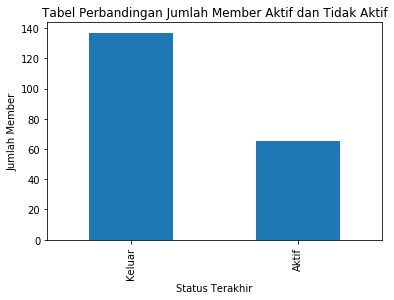

In [16]:
#Seperti apa sih perbandingan member JKT48 yang masih aktif dan sudah keluar?

jkt48_frame.groupby(['Status Terakhir'])['Nama'].count().plot('bar') # groupby digunakan untuk mengumpulkan informasi dalam kategori lalu menjumlahkannya
plt.ylabel('Jumlah Member')
plt.xlabel('Status Terakhir')
plt.title('Tabel Perbandingan Jumlah Member Aktif dan Tidak Aktif')
positions = (0,1)
labels = ('Keluar','Aktif')
plt.xticks(positions,labels)

Text(0.5, 1.0, 'Tabel Perbandingan Jumlah Member Aktif dan Tidak Aktif')

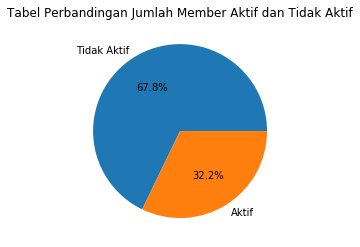

In [17]:
# Mengukur prosentase jumlah member aktif dan tidak aktif (eks-member)
pie1 = jkt48_frame.groupby(['Status Terakhir'])['Nama'].count()
plt.pie(x=pie1,autopct='%1.1f%%',labels=('Tidak Aktif','Aktif'))
plt.title('Tabel Perbandingan Jumlah Member Aktif dan Tidak Aktif')

Text(0.5, 1.0, 'Tabel Perbandingan Jumlah Member Masuk dan Keluar Tiap Tahunnya')

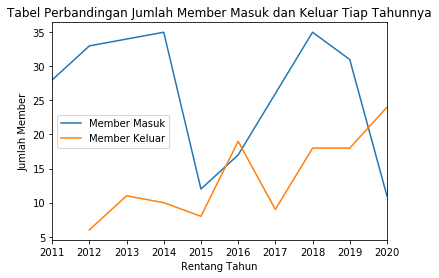

In [20]:
#- Sebanyak apa sih member yang keluar tiap tahunnya?
#- Sebanyak apa sih member yang masuk tiap tahunnya?

jkt48_frame.groupby(['Tahun Debut'])['Nama'].count().plot()
jkt48_frame.groupby(['Tahun Keluar'])['Nama'].count().plot()
plt.legend(['Member Masuk','Member Keluar'],frameon=True)
plt.xlabel('Rentang Tahun')
plt.ylabel('Jumlah Member')
plt.title('Tabel Perbandingan Jumlah Member Masuk dan Keluar Tiap Tahunnya')

Text(0.5, 1, 'Sebaran Waktu Keluar Anggota JKT48 2016')

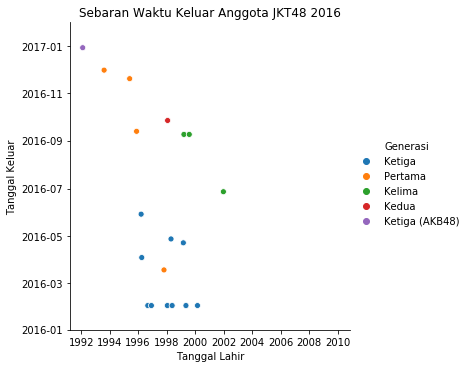

In [23]:
timestamp2 = dt.datetime.fromtimestamp(1451606400)
timestamp3 = dt.datetime.fromtimestamp(1485907200)

#melihat siapa saja member yang keluar pada 2016
sns.color_palette('colorblind')
ex2016 = jkt48_frame.loc[jkt48_frame['Tahun Keluar'] == 2016]
sns.relplot(data=ex2016,x='Tanggal Lahir',y='Tanggal Keluar',hue='Generasi')
plt.ylim([timestamp2,timestamp3]) # batasi y ticks menggunakan timestamp
plt.title('Sebaran Waktu Keluar Anggota JKT48 2016')

Text(0.5, 1.0, 'Prosentase generasi yang keluar pada 2018-2019')

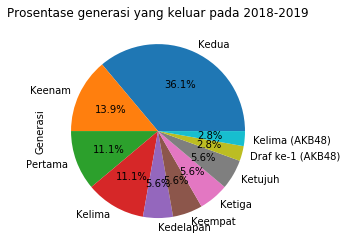

In [25]:
#mengukur rata-rata generasi anggota jkt48 yang keluar di tahun 2018-2019
ex1819 = jkt48_frame.loc[jkt48_frame['Tahun Keluar'].isin([2018,2019])] # fungsi isin digunakan untuk memfilter data menggunakan dua kategori atau lebih
counts = ex1819['Generasi'].value_counts()
counts.plot(kind='pie',autopct='%1.1f%%',radius=1)
plt.title('Prosentase generasi yang keluar pada 2018-2019')

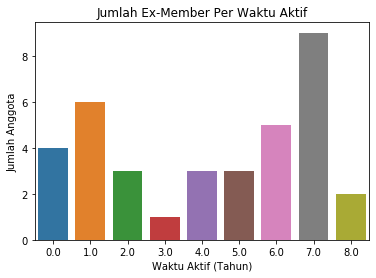

In [26]:
sns.countplot(data=ex1819,x='Waktu Aktif')
plt.ylabel("Jumlah Anggota")
plt.xlabel('Waktu Aktif (Tahun)')
plt.title("Jumlah Ex-Member Per Waktu Aktif")
plt.style.use('classic')
plt.show()

C:\Users\Compaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


Text(0.5, 1.0, 'Jumlah Waktu Aktif Ex-Member JKT48')

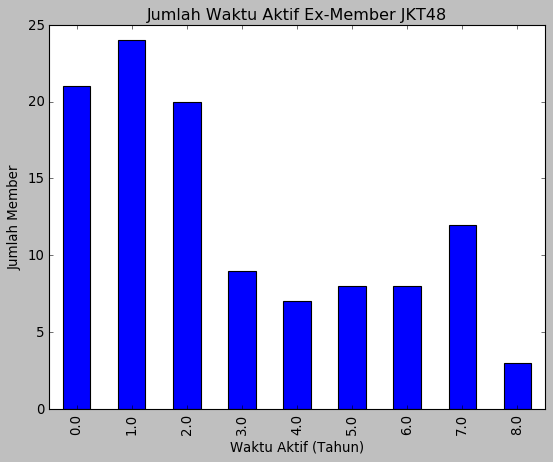

In [31]:
#bagaimana waktu aktif semua anggota yang keluar
jkt48_frame.loc[jkt48_frame['Status Terakhir'] == False].groupby(['Waktu Aktif'])['Nama'].count().plot('bar') # Setelah difiltering menggunakan loc, kemudian dikelompokkan menggunakan groupby
plt.style.use('ggplot')
plt.ylabel('Jumlah Member')
plt.xlabel('Waktu Aktif (Tahun)')
plt.title('Jumlah Waktu Aktif Ex-Member JKT48')

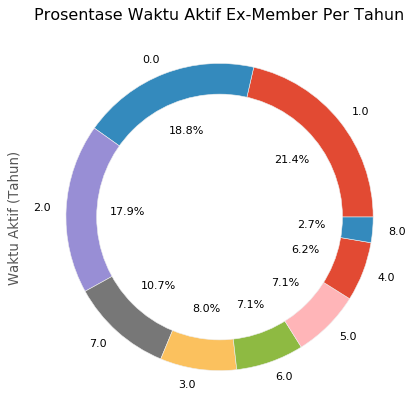

In [32]:
#bagaimana prosentase waktu aktif semua anggota yang keluar
exmem_pct = jkt48_frame.loc[jkt48_frame['Status Terakhir'] == False]['Waktu Aktif'].value_counts() # mengukur prosentase waktu aktif dengan value counts
exmem_pct.plot(kind='pie',autopct='%1.1f%%')
plt.style.use('ggplot')
plt.ylabel('Waktu Aktif (Tahun)')
plt.title('Prosentase Waktu Aktif Ex-Member Per Tahun')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

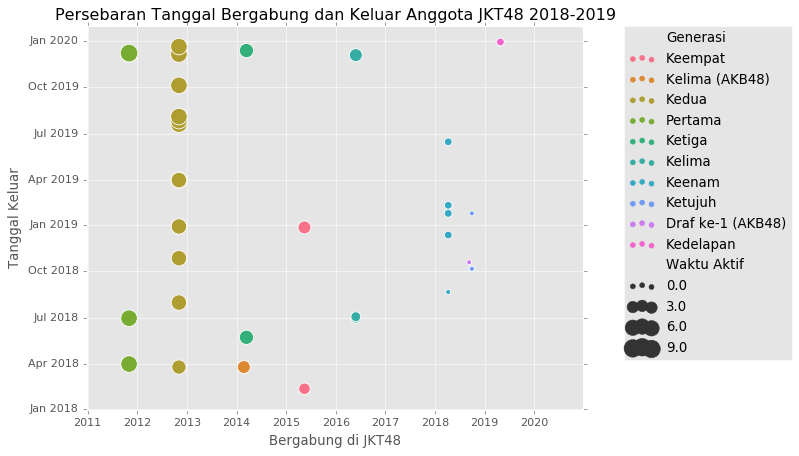

In [33]:
timestamp2011 = dt.datetime.fromtimestamp(1293753600)
timestamp2020 = dt.datetime.fromtimestamp(1609165657)
timestamp2018 = dt.datetime.fromtimestamp(1514678400)
timestamp2019 = dt.datetime.fromtimestamp(1580515200)
sns.scatterplot(data=ex1819,x='Bergabung di JKT48',y='Tanggal Keluar',hue='Generasi',size='Waktu Aktif',sizes=(20,250))
plt.ylim([timestamp2018,timestamp2019])
plt.xlim([timestamp2011,timestamp2020])
plt.legend(bbox_to_anchor=(1.42,1),borderaxespad=0,frameon=True)
plt.style.use('classic')
plt.title('Persebaran Tanggal Bergabung dan Keluar Anggota JKT48 2018-2019')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

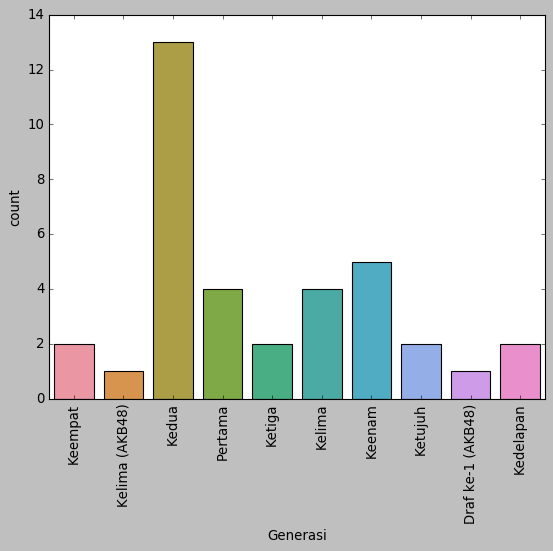

In [35]:
sns.countplot(data=ex1819,x='Generasi')
plt.xticks(rotation='vertical')

Text(0.5, 1.0, 'Tabel Jumlah Eks-Member Berdasarkan Waktu Aktif')

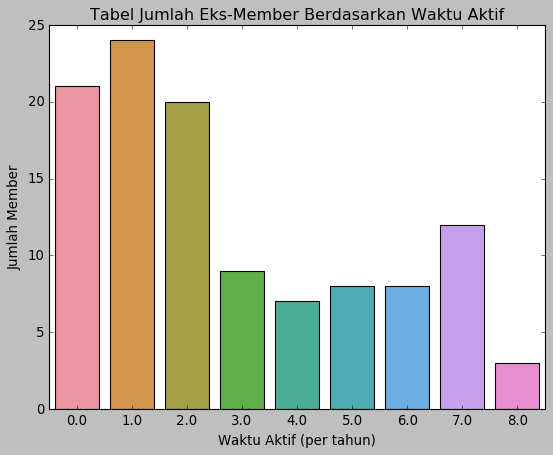

In [36]:
#seberapa lama waktu aktif yang dimiliki ex member?
ex1 = jkt48_frame.loc[jkt48_frame['Status Terakhir'] == False]
sns.countplot(data=ex1,x='Waktu Aktif')
plt.ylabel('Jumlah Member')
plt.xlabel('Waktu Aktif (per tahun)')
plt.title('Tabel Jumlah Eks-Member Berdasarkan Waktu Aktif')

Text(0.5, 1.0, 'Kue Perbandingan Waktu Aktif Eks-Member Pertahun')

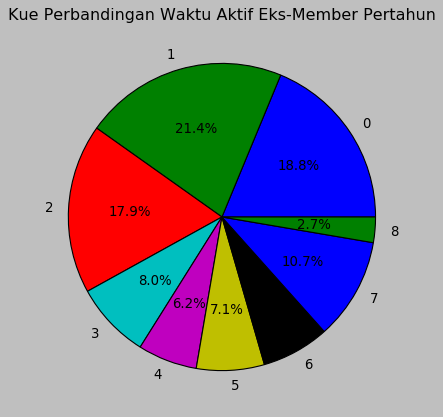

In [39]:
ex2 = ex1.groupby(['Waktu Aktif'])['Nama'].count()
plt.pie(x=ex2,autopct='%1.1f%%',labels=(0,1,2,3,4,5,6,7,8))
plt.title('Kue Perbandingan Waktu Aktif Eks-Member Pertahun')